In [100]:
import numpy as np

# Define the finite step
h = 10**(-5)

# Define method
method = 'central'

# Set range for plotting
x_min = -2
x_max =  8

# Define function
def f(x):
    return 1+(1/2)*np.tanh(x)

In [101]:
# First derivative
def first_c(f,a,method='central',h=0.01):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'forward', 'backward' or 'central'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            central: f(a+h) - f(a-h))/2h
            forward: f(a+h) - f(a))/h
            backward: f(a) - f(a-h))/h            
    '''
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

     

In [102]:
# Second derivative
def second_c(f,a,method='central',h=0.01):

    if method == 'central':
        return (first_c(f,a + h,method,h) - first_c(f,a - h,method,h))/(2*h)
    elif method == 'forward':
        return (first_c(f,a + h,method,h) - first_c(f,a,method,h))/h
    elif method == 'backward':
        return (first_c(f,a,method,h) - first_c(f,a - h,method,h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")


In [103]:
# Third derivative
def third_c(f,a,method='central',h=0.01):

    if method == 'central':
        return (second_c(f,a + h,method,h) - second_c(f,a - h,method,h))/(2*h)
    elif method == 'forward':
        return (second_c(f,a + h,method,h) - second_c(f,a,method,h))/h
    elif method == 'backward':
        return (second_c(f,a,method,h) - second_c(f,a - h,method,h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

In [104]:

print("Using central difference: \n")
print("     x       function     first_c      secind_c              third_c")

for x in range(x_min,x_max):
    print(x, f(x), first_c(f,x,method,h), second_c(f,x,method,h), third_c(f,x,method,h))

Using central difference: 

     x       function     first_c      secind_c              third_c
-2 0.5179862099620915 0.03532541242856624 0.06810940700319179 0.1249000902703301
-1 0.6192029220221176 0.20998717081277538 0.3198497022793845 0.30531133177191805
0 1.0 0.4999999999810711 2.7755575615628914e-07 -0.9853229343548263
1 1.3807970779778824 0.2099871708183265 -0.3198497022793845 0.27755575615628914
2 1.4820137900379085 0.03532541242856624 -0.06810940700319179 0.11102230246251564
3 1.4975273768433652 0.004933018582509163 -0.00981770220676026 0.02775557561562891
4 1.4996646498695334 0.0006704753419128905 -0.0013389289676979386 0.0
5 1.4999546021312975 9.07916186676516e-05 -0.00018152146452621307 -0.02775557561562891
6 1.4999938558253978 1.2288270401228372e-05 -2.442490654175344e-05 0.02775557561562891
7 1.4999991684719722 1.663058579737253e-06 -2.775557561562891e-06 -0.02775557561562891


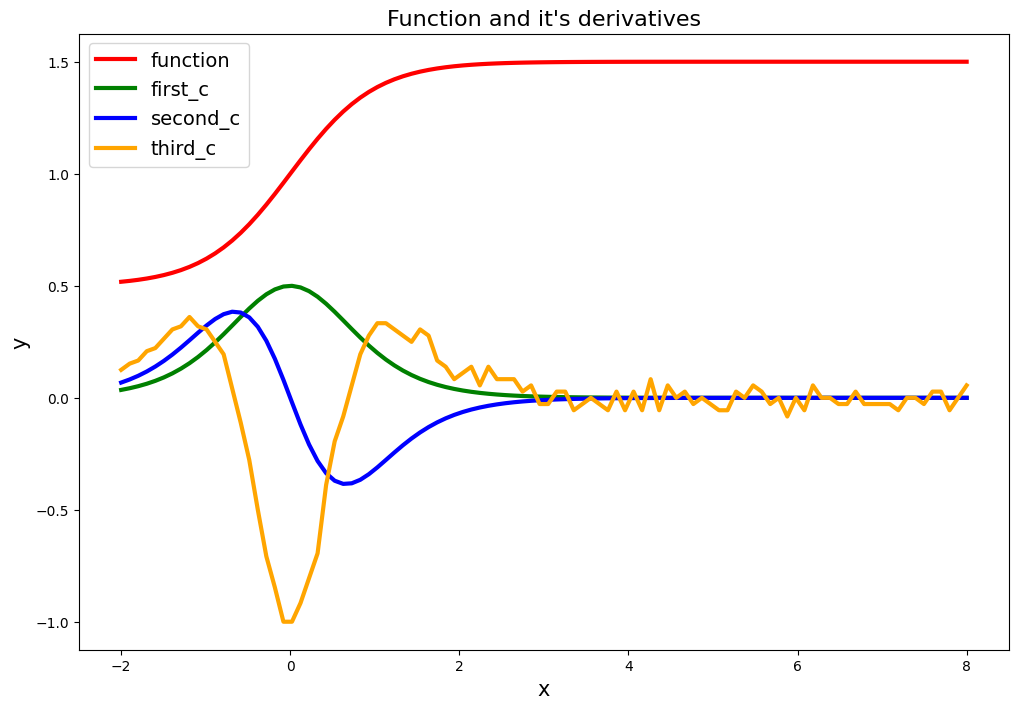

In [105]:
# Plot the function and it's derivatives
import matplotlib.pyplot as plt


plt.figure(figsize=(12,8))
plt.title("Function and it's derivatives",fontsize=16) 

xlin = np.linspace(x_min, x_max, num=100)
plt.plot(xlin,f(xlin),linewidth=3,color='red',linestyle='solid', label="function")
plt.plot(xlin,first_c(f,xlin,method,h),linewidth=3,color='green',linestyle='solid', label="first_c")
plt.plot(xlin,second_c(f,xlin,method,h),linewidth=3,color='blue',linestyle='solid', label="second_c")
plt.plot(xlin,third_c(f,xlin,method,h),linewidth=3,color='orange',linestyle='solid', label="third_c")


plt.legend(prop={'size':14})

plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15);

    
plt.show()
     